<a href="https://colab.research.google.com/github/hrithik2105/Time-Series-Analysis/blob/main/TImeseries(seasonal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series analysis and forecasting: Seasonal data

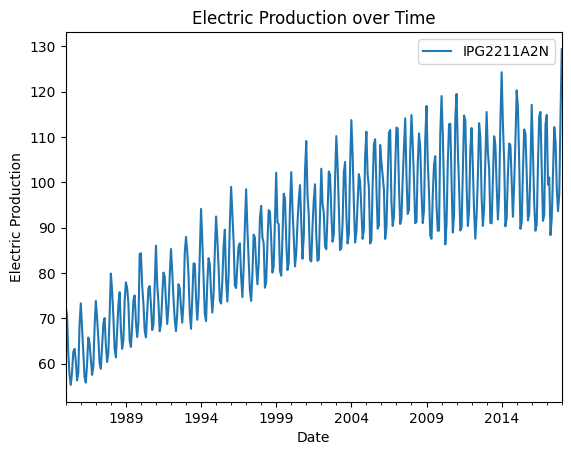

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Electric_Production.csv', parse_dates=['DATE'], index_col='DATE')

df.plot()
plt.title('Electric Production over Time')
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.show()

From the visualization of the dataset above, we can see that there is an increasing trend and regular oscillations of the data around the trend.The recurring peaks and troughs suggest that the dataset is indeed seasonal.
We can confirm this by looking at the ACF and PACF too which we will be doing further along

In [ ]:
df.isnull().sum()

IPG2211A2N    0
dtype: int64

No preprocessing required as there are no NULL values

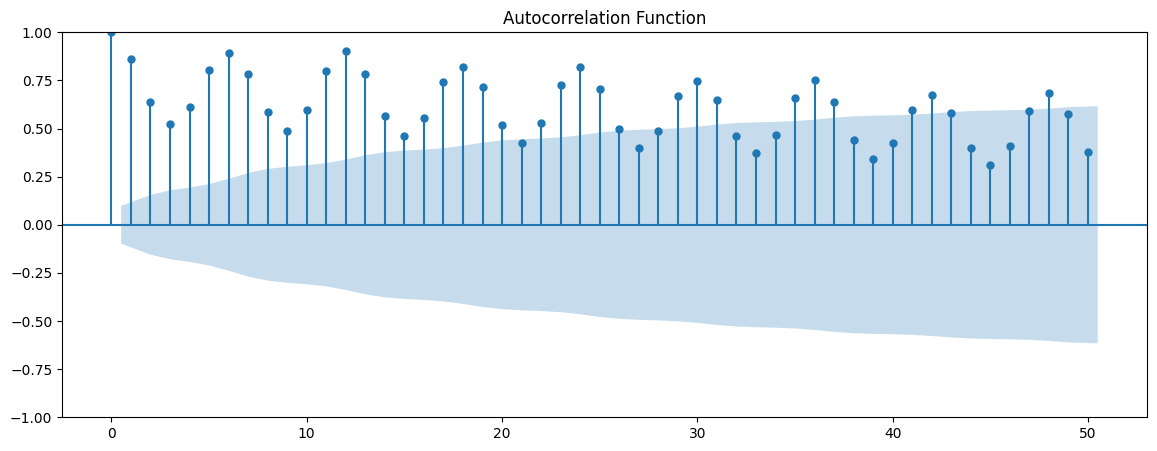

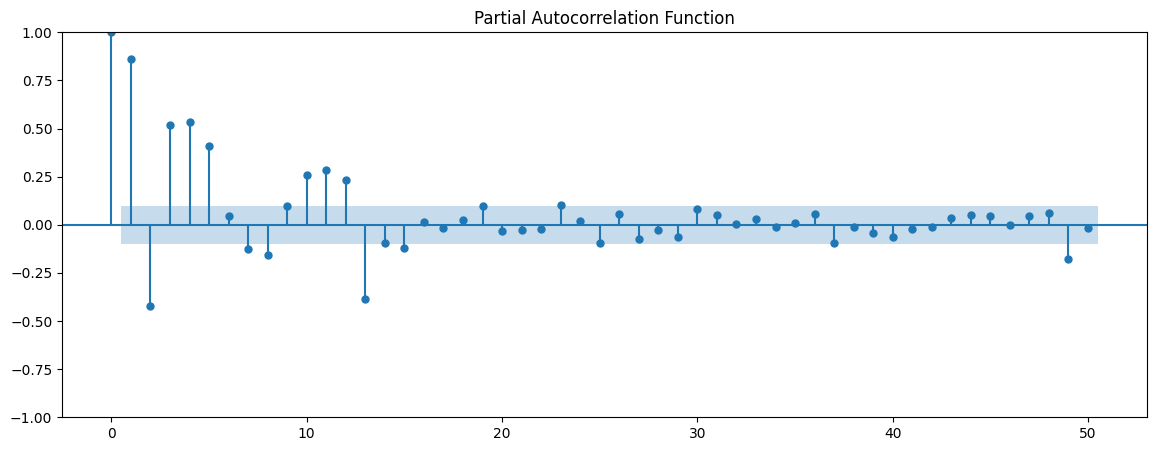

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Since its monthly data
df.index.freq = 'MS'

# ACF
plt.figure(figsize=(14, 5))
plot_acf(df['IPG2211A2N'], lags=50, ax=plt.gca())
plt.title('Autocorrelation Function')
plt.show()

# PACF
plt.figure(figsize=(14, 5))
plot_pacf(df['IPG2211A2N'], lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function')
plt.show()

We can observe from the ACF that there are significant spikes at lags 12,24,36 and so on. This clearly tells us that the dataset is indeed seasonal.

Also, the clear, seasonal spikes in the ACF plot combined with the PACF trailing off after the first few lags suggest that a Seasonal ARIMA (SARIMA) model may be appropriate for this dataset. We are going to implement that moving forward.

Finally The ACF plot shows a gradual decay, which is a typical indication of a non-stationary series. Lets confirm this by doing the ADF test.

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['IPG2211A2N'])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.256990
p-value: 0.186215
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


As we can observe that p = 0.18 which indicates that the dataset is non-stationary.

Let's make it stationary by applying the first order differencing to it.

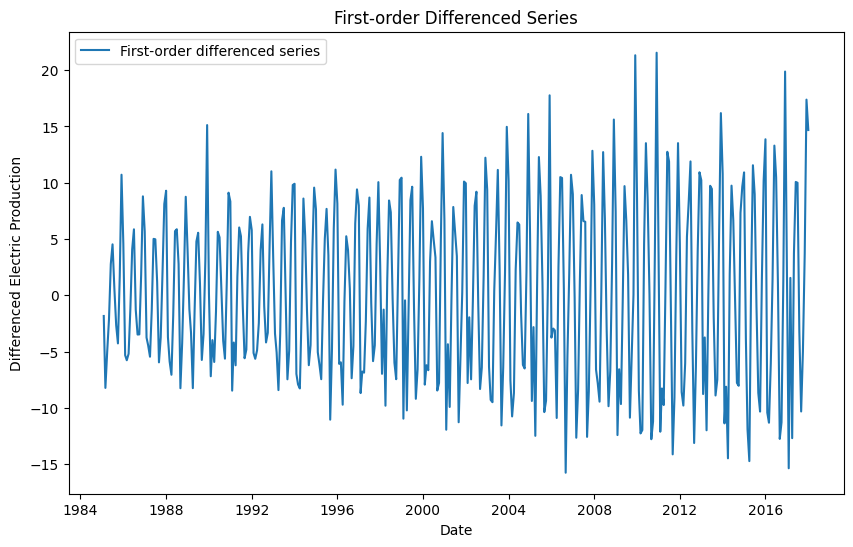

In [ ]:
df_diff = df.diff().dropna()

#Plotting the differenced data
plt.figure(figsize=(10, 6))
plt.plot(df_diff, label='First-order differenced series')
plt.title('First-order Differenced Series')
plt.xlabel('Date')
plt.ylabel('Differenced Electric Production')
plt.legend()
plt.show()

Lets check with the ADF test once again now.

In [ ]:
adf_test = adfuller(df_diff['IPG2211A2N'])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.104891
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


Since p-value = 0.000, we can safely say that our dataset is now stationary.

# Model selection:

Lets look at the ACF and PACF now for the differenced dataset to determine which model/models might be suitable

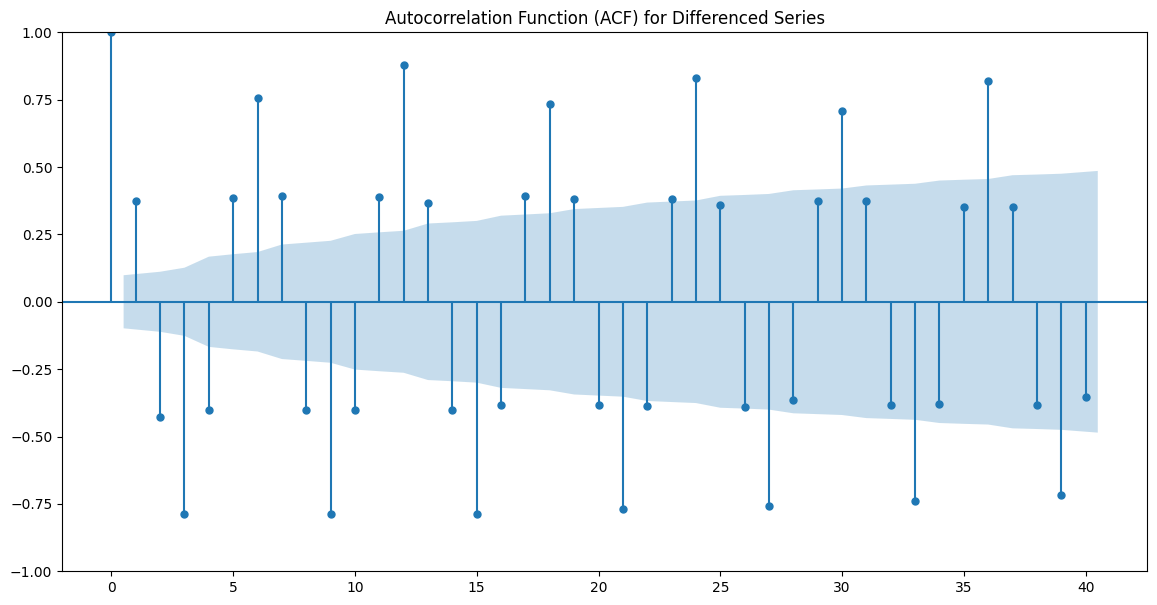

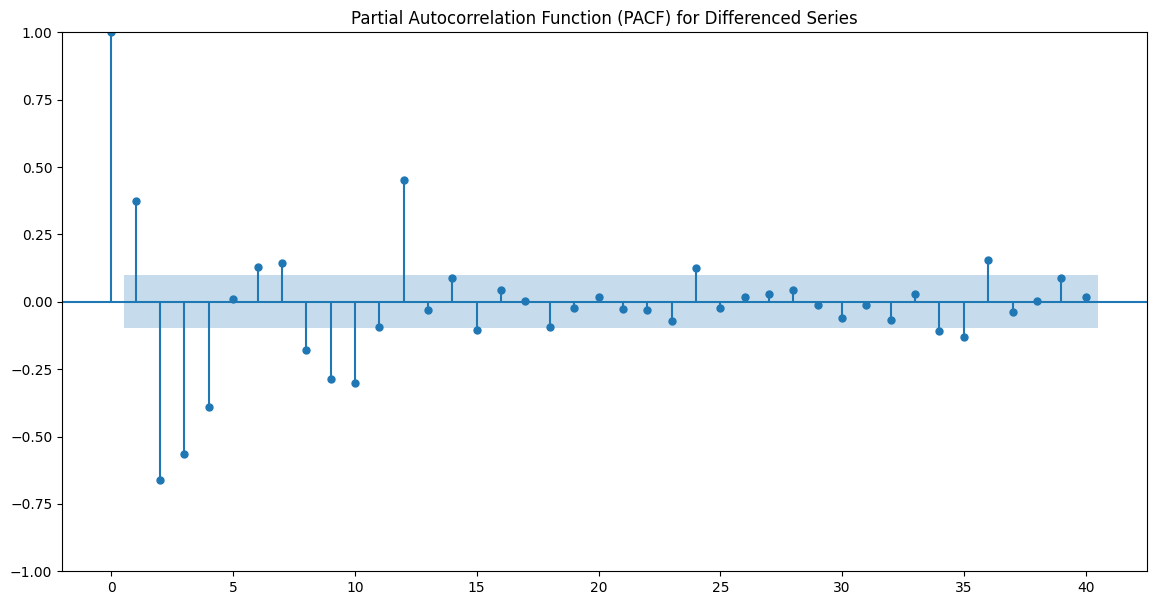

In [ ]:
#  ACF
plt.figure(figsize=(14, 7))
plot_acf(df_diff['IPG2211A2N'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) for Differenced Series')
plt.show()

# PACF
plt.figure(figsize=(14, 7))
plot_pacf(df_diff['IPG2211A2N'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) for Differenced Series')
plt.show()

The PACF shows significant spikes at lags 1,2,3,4,5. So, Lets try out ARIMA(1,1,0), (2,1,0), (3,1,0),(4,1,0) and (5,1,0).

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


model1 = ARIMA(df_diff['IPG2211A2N'], order=(1,1,0))
model_fit1 = model1.fit()

model2 = ARIMA(df_diff['IPG2211A2N'], order=(2,1,0))
model_fit2 = model2.fit()

model3 = ARIMA(df_diff['IPG2211A2N'], order=(3,1,0))
model_fit3 = model3.fit()

model4 = ARIMA(df_diff['IPG2211A2N'], order=(4,1,0))
model_fit4 = model4.fit()

model5 = ARIMA(df_diff['IPG2211A2N'], order=(5,1,0))
model_fit5 = model5.fit()

aic_value1 = model_fit1.aic
bic_value1= model_fit1.bic

aic_value2 = model_fit2.aic
bic_value2 = model_fit2.bic

aic_value3 = model_fit3.aic
bic_value3 = model_fit3.bic

aic_value4 = model_fit4.aic
bic_value4 = model_fit4.bic

aic_value4 = model_fit4.aic
bic_value4 = model_fit4.bic

aic_value5 = model_fit5.aic
bic_value5 = model_fit5.bic


print("AIC(110):", aic_value1)
print("BIC(110):", bic_value1)
print("\nAIC(210):", aic_value2)
print("BIC(210):", bic_value2)
print("\nAIC(310):", aic_value3)
print("BIC(310):", bic_value3)
print("\nAIC(410):", aic_value4)
print("BIC(410):", bic_value4)
print("\nAIC(510):", aic_value5)
print("BIC(510):", bic_value5)


AIC(110): 2821.7366981623295
BIC(110): 2829.694469692132

AIC(210): 2762.38160797179
BIC(210): 2774.318265266493

AIC(310): 2612.7964069482796
BIC(310): 2628.7119500078843

AIC(410): 2424.3413617275573
BIC(410): 2444.235790552063

AIC(510): 2326.8343567293255
BIC(510): 2350.707671318732


So, Since the AIC and BIC values of ARIMA(5,1,0) is the least. We can move forward with that model.

Also, the seasonal order for this dataset would be SARIMA(5,1,0)(1,1,0)[12]. So lets try implementing this.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# seasonal order
seasonal_order = (1, 1, 0, 12)

# Fitting the SARIMA model to the differenced data
model = SARIMAX(df_diff['IPG2211A2N'], order=(5, 1, 0), seasonal_order=seasonal_order)
model_fit = model.fit()

# Extracting AIC and BIC values
aic_value = model_fit.aic
bic_value = model_fit.bic
# Printing AIC, BIC, and Ljung-Box test results
print("AIC:", aic_value)
print("BIC:", bic_value)

AIC: 2004.011748591004
BIC: 2031.6479935152686


To confirm that this is the appropriate model, we will try SARIMA(1,1,0)(1,1,0)[12] and SARIMA(2,1,0)(1,1,0)[12]

In [ ]:
model12 = SARIMAX(df_diff['IPG2211A2N'], order=(1, 1, 0), seasonal_order=seasonal_order)
model_fit12 = model12.fit()
aic_value = model_fit12.aic
bic_value = model_fit12.bic
print("AIC:", aic_value)
print("BIC:", bic_value)


AIC: 2181.9051197782983
BIC: 2193.7492247458404


In [ ]:
model13 = SARIMAX(df_diff['IPG2211A2N'], order=(2, 1, 0), seasonal_order=seasonal_order)
model_fit13 = model13.fit()
aic_value = model_fit13.aic
bic_value = model_fit13.bic
print("AIC:", aic_value)
print("BIC:", bic_value)


AIC: 2062.283096960232
BIC: 2078.0752369169545


AS we can see the AIC and BIC values for SARIMA(5,1,0)(1,1,0)[12] is the least. So, we'll go ahead with this model to display the forecast on the original plot. We'll do it for 2 years(24 periods)

In [ ]:
model = SARIMAX(df['IPG2211A2N'], order=(5, 1, 0), seasonal_order=seasonal_order)
model_fit = model.fit()
n_periods = 24
forecast = model_fit.get_forecast(steps=n_periods)

# Extracting the forecasted values and their confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Printing the forecasted values and confidence intervals
print("Forecasted Values:")
print(forecast_mean)

print("\nForecasted Confidence Intervals:")
print(forecast_ci)

Forecasted Values:
2018-02-01    111.779995
2018-03-01    105.493480
2018-04-01     96.341271
2018-05-01     98.677148
2018-06-01    109.633617
2018-07-01    121.116972
2018-08-01    119.507999
2018-09-01    107.796988
2018-10-01    100.565297
2018-11-01    103.346708
2018-12-01    121.501135
2019-01-01    131.558603
2019-02-01    114.856508
2019-03-01    111.473150
2019-04-01    101.006123
2019-05-01    103.876272
2019-06-01    114.462608
2019-07-01    125.392293
2019-08-01    123.187218
2019-09-01    111.996093
2019-10-01    105.609799
2019-11-01    108.751615
2019-12-01    126.610314
2020-01-01    138.416448
Freq: MS, Name: predicted_mean, dtype: float64

Forecasted Confidence Intervals:
            lower IPG2211A2N  upper IPG2211A2N
2018-02-01        106.268367        117.291623
2018-03-01         98.724341        112.262619
2018-04-01         89.132094        103.550449
2018-05-01         90.888709        106.465587
2018-06-01        101.462582        117.804652
2018-07-01        

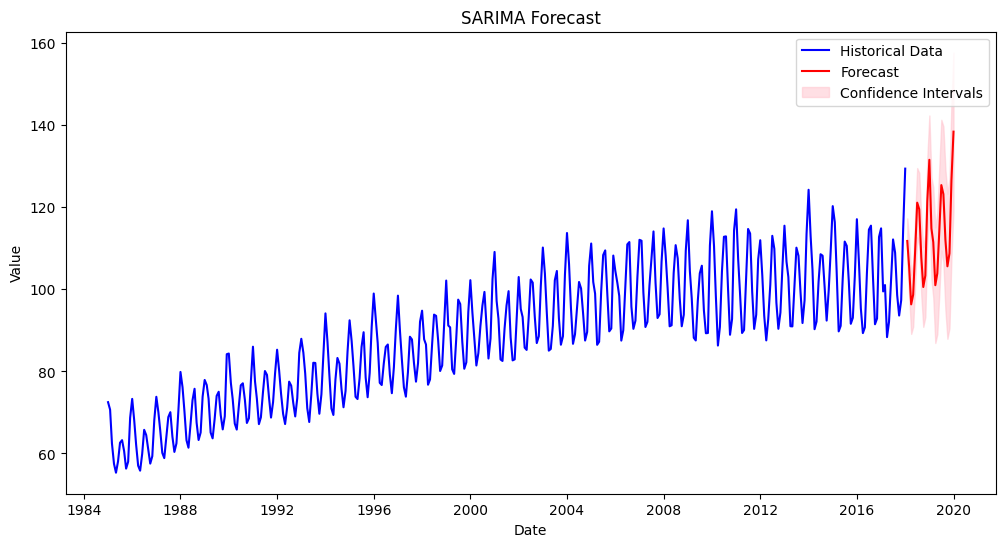

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['IPG2211A2N'], label='Historical Data', color='blue')

# Plotting the forecasted values
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')

# Filling the confidence intervals
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.5, label='Confidence Intervals')

#Plot
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMA Forecast')
plt.legend()

The above figure shows the forecasted values marked in red.